In [1]:
cd ..

/home/abhishekabhishek/git/UnsupGenModbyMPS


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml

from MPScumulant import MPS_c
import mps_circuit_helpers
import mps_circuit
import metrics

In [3]:
%load_ext autoreload

Check the properties of the original trained MPS

In [4]:
m = MPS_c(16)
m.loadMPS('BS-MPS')

# check the properties of the matrices in the MPS
for i in range(len(m.matrices)):
    tn_core = m.matrices[i]
    print(i, tn_core.shape)

0 (1, 2, 2)
1 (2, 2, 4)
2 (4, 2, 8)
3 (8, 2, 15)
4 (15, 2, 16)
5 (16, 2, 16)
6 (16, 2, 16)
7 (16, 2, 15)
8 (15, 2, 16)
9 (16, 2, 16)
10 (16, 2, 16)
11 (16, 2, 15)
12 (15, 2, 8)
13 (8, 2, 4)
14 (4, 2, 2)
15 (2, 2, 1)


In [5]:
mps_circuit_helpers.are_isometries(m)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 4) True True
2 (4, 2, 8) True True
3 (8, 2, 15) True False
4 (15, 2, 16) True False
5 (16, 2, 16) True False
6 (16, 2, 16) True False
7 (16, 2, 15) True False
8 (15, 2, 16) True False
9 (16, 2, 16) True False
10 (16, 2, 16) True False
11 (16, 2, 15) True False
12 (15, 2, 8) True False
13 (8, 2, 4) True False
14 (4, 2, 2) False False
15 (2, 2, 1) False False


Get the multi-qubit unitary matrices from the mps

In [6]:
%autoreload
mps_unitaries = mps_circuit_helpers.get_mps_unitaries(m)

padding the mps core tensors
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 4), 2
i = 2, (4, 2, 8), 4
i = 3, (8, 2, 16), 8
i = 4, (16, 2, 16), 16
i = 5, (16, 2, 16), 16
i = 6, (16, 2, 16), 16
i = 7, (16, 2, 16), 16
i = 8, (16, 2, 16), 16
i = 9, (16, 2, 16), 16
i = 10, (16, 2, 16), 16
i = 11, (16, 2, 16), 16
i = 12, (16, 2, 8), 16
i = 13, (8, 2, 4), 8
i = 14, (4, 2, 2), 4
left canonicalizing the padded MPS
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
bond: 11
bond: 12
bond: 13
bond: 14


Create the MPS-PQC circuit

(<Figure size 1296x1224 with 1 Axes>, <Axes: >)

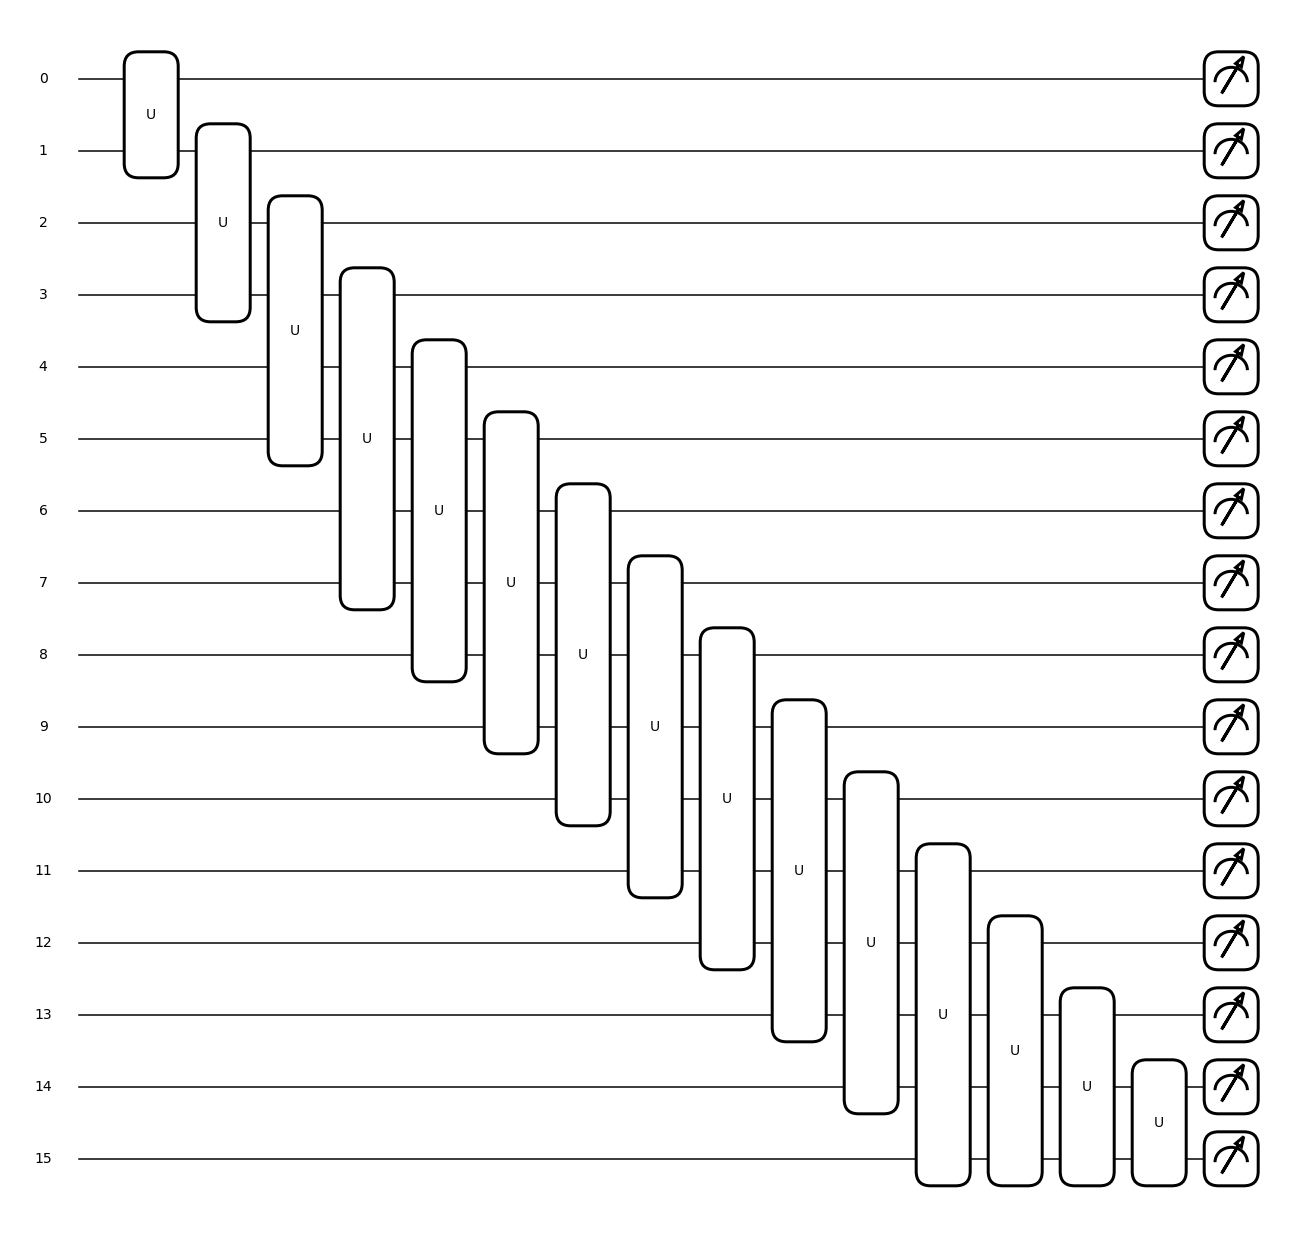

In [8]:
%autoreload
circuit = mps_circuit.mps_unitaries_to_circuit(mps_unitaries)
qml.drawer.draw_mpl(circuit)()

Load the data and calculate the KL-divergence of the trained model

In [9]:
data = np.load('BStest/BSdata.npy')
print(data.shape, data.dtype)

(30, 4, 4) bool


In [11]:
probs = circuit()
len(probs)

65536

In [22]:
%autoreload
data = data.astype(np.int32).reshape(-1, data.shape[1]*data.shape[2])
filtered_probs = metrics.filter_probs(probs, data)

IndexError: tuple index out of range

In [23]:
kl_div = metrics.kl_divergence_estimate(filtered_probs)
print(kl_div)

-0.0011101585938908683
